In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_excel('dataset_saham 2021-2023.xlsx')
df

,Kode,Nama Perusahaan,Sektor,Industri,EPS,S_0,S_1,S_2,S_3,Avg Volume,Dividen,Percentage Dividen,Mean Log Return,Std Log Return,PER
0,ACES,Ace Hardware Indonesia Tbk.,Consumer Cyclical,Industry: Specialty Retail,46.66,1700.000000,1280.0000,496.0,720,5.622253e+07,83.800001,0.116389,-0.001175,0.026282,15.430776
1,ADRO,Adaro Energy Indonesia Tbk.,Energy,Industry: Thermal Coal,910.90,1455.000000,2250.0000,3850.0,2380,9.889297e+07,1059.869959,0.445324,0.000673,0.026537,2.612801
2,AKRA,AKR Corporindo Tbk,Energy,Industry: Oil & Gas Refining & Marketing,129.17,654.000000,822.0000,1400.0,1475,5.146311e+07,194.000000,0.131525,0.001113,0.024865,11.419060
3,AMRT,Sumber Alfaria Trijaya Tbk.,Consumer Defensive,Industry: Grocery Stores,79.20,800.000000,1215.0000,2650.0,2930,3.363999e+07,52.140000,0.017795,0.001776,0.026814,36.994949
4,ANTM,Aneka Tambang Tbk.,Basic Materials,Industry: Gold,168.19,2190.000000,2250.0000,1985.0,1705,1.473929e+08,134.978203,0.079166,-0.000342,0.028690,10.137345
5,ARTO,Bank Jago Tbk,Financial Services,Industry: Banks - Regional,1.70,3516.352295,16000.0000,3720.0,2900,2.408157e+07,0.000000,0.000000,-0.000264,0.043036,1705.882353
6,ASII,Astra International Tbk,Consumer Cyclical,Industry: Auto Parts,773.92,6225.000000,5700.0000,5700.0,5650,4.786175e+07,1064.000000,0.188319,-0.000133,0.017639,7.300496
7,BBCA,Bank Central Asia Tbk.,Financial Services,Industry: Banks - Regional,389.94,6835.000000,7300.0000,8550.0,9400,8.437126e+07,478.900002,0.050947,0.000436,0.013412,24.106273
8,BBNI,Bank Negara Indonesia (Persero) Tbk.,Financial Services,Industry: Banks - Regional,546.56,3187.500000,3375.0000,4612.5,5375,6.167185e+07,583.099611,0.108484,0.000715,0.017223,9.834236
9,BBRI,Bank Rakyat Indonesia (Persero) Tbk,Financial Services,Industry: Banks - Regional,369.72,4310.000000,4110.0000,4940.0,5725,1.502938e+08,552.385562,0.096487,0.000388,0.016697,15.484691


In [3]:
fitur1 = df[['Sektor', 'EPS', 'S_3', 'Avg Volume', 'Percentage Dividen', 'Mean Log Return', 'Std Log Return', 'PER']]

In [4]:
fitur1.describe()

,EPS,S_3,Avg Volume,Percentage Dividen,Mean Log Return,Std Log Return,PER
count,45.000000,45.000000,4.500000e+01,45.000000,45.000000,45.000000,45.000000
mean,645.841111,4508.155556,1.247554e+08,0.130073,-0.000096,0.033023,41.340136
std,1697.420871,5663.997271,4.899554e+08,0.166093,0.001003,0.035798,267.397746
min,-971.040000,86.000000,1.547247e+06,0.000000,-0.003508,0.013412,-421.348315
25%,46.660000,1330.000000,1.967321e+07,0.031763,-0.000480,0.020414,4.842564
50%,147.890000,2380.000000,4.108521e+07,0.078771,-0.000133,0.026282,11.419060
75%,546.560000,5650.000000,7.465962e+07,0.131525,0.000673,0.032148,16.554904
max,9807.110000,25650.000000,3.319339e+09,0.761172,0.001776,0.241104,1705.882353


In [5]:
sektor_unik = df['Sektor'].unique()
sektor_unik

array(['Consumer Cyclical', 'Energy', 'Consumer Defensive',
       'Basic Materials', 'Financial Services', 'Communication Services',
       'Technology', 'Healthcare', 'Utilities'], dtype=object)

In [6]:
# Extract the 'Sektor' column for one-hot encoding
sektor_column = fitur1[['Sektor']]

# Extract the remaining columns for Min-Max scaling
other_columns = fitur1.drop(columns=['Sektor'])

# Define the transformers for one-hot encoding and Min-Max scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('sektor_onehot', OneHotEncoder(drop = 'first'), ['Sektor']),
        ('MaxAbsScaler', MaxAbsScaler(), other_columns.columns.tolist())
    ],
    remainder='passthrough'
)

# Create a pipeline with the defined preprocessor
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
transformed_data = pipeline.fit_transform(fitur1)

# Extract column names after transformation
column_names = list(preprocessor.transformers_[0][1].get_feature_names_out()) + other_columns.columns.tolist()

# Convert the transformed data back to a DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=column_names)

# Display the transformed DataFrame
transformed_df

,Sektor_Communication Services,Sektor_Consumer Cyclical,Sektor_Consumer Defensive,Sektor_Energy,Sektor_Financial Services,Sektor_Healthcare,Sektor_Technology,Sektor_Utilities,EPS,S_3,Avg Volume,Percentage Dividen,Mean Log Return,Std Log Return,PER
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004758,0.028070,0.016938,0.152908,-0.335069,0.109009,0.009046
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.092882,0.092788,0.029793,0.585050,0.191921,0.110064,0.001532
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.013171,0.057505,0.015504,0.172793,0.317196,0.103131,0.006694
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.008076,0.114230,0.010135,0.023379,0.506288,0.111212,0.021687
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017150,0.066472,0.044404,0.104006,-0.097633,0.118992,0.005943
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000173,0.113060,0.007255,0.000000,-0.075160,0.178498,1.000000
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078914,0.220273,0.014419,0.247406,-0.037799,0.073158,0.004280
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.039761,0.366472,0.025418,0.066932,0.124278,0.055625,0.014131
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.055731,0.209552,0.018580,0.142522,0.203788,0.071434,0.005765
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.037699,0.223197,0.045278,0.126761,0.110725,0.069251,0.009077


C:\Users\giova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\giova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\giova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\giova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0, 0.5, 'Within Sum of Square')

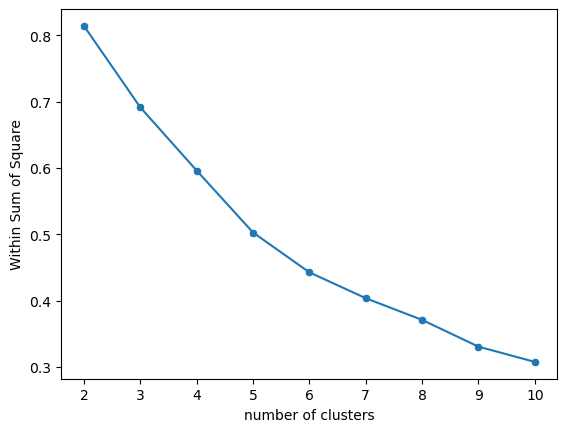

In [7]:
def cluster_evaluation(number_of_cluster):
    # clusterings variation
    clusterings = [KMeans(n_clusters=k).fit(transformed_df) for k in number_of_cluster]
    centroids = [k.cluster_centers_ for k in clusterings]
    
    # within sumsq
    D_k = [cdist(transformed_df, cent, 'euclidean') for cent in centroids] 
    cIdx = [np.argmin(D, axis=1) for D in D_k] 
    dist = [np.min(D, axis=1) for D in D_k] 
    avgWithinSS = [sum(d)/transformed_df.shape[0] for d in dist] 
    
    return avgWithinSS
    
number_of_clusters = range(2,11) #2 sd 10
avgWithinsq = cluster_evaluation(number_of_clusters)

sns.scatterplot(x=number_of_clusters, y=avgWithinsq)
sns.lineplot(x=number_of_clusters, y=avgWithinsq)

plt.xlabel('number of clusters')
plt.ylabel('Within Sum of Square')

In [8]:
#clustering with KMeans

from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters = 5, random_state=42).fit(transformed_df)
labels1 = kmeans1.labels_
df['K-Means Cluster'] = labels1

df

C:\Users\giova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\giova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Kode,Nama Perusahaan,Sektor,Industri,EPS,S_0,S_1,S_2,S_3,Avg Volume,Dividen,Percentage Dividen,Mean Log Return,Std Log Return,PER,K-Means Cluster
0,ACES,Ace Hardware Indonesia Tbk.,Consumer Cyclical,Industry: Specialty Retail,46.66,1700.000000,1280.0000,496.0,720,5.622253e+07,83.800001,0.116389,-0.001175,0.026282,15.430776,4
1,ADRO,Adaro Energy Indonesia Tbk.,Energy,Industry: Thermal Coal,910.90,1455.000000,2250.0000,3850.0,2380,9.889297e+07,1059.869959,0.445324,0.000673,0.026537,2.612801,2
2,AKRA,AKR Corporindo Tbk,Energy,Industry: Oil & Gas Refining & Marketing,129.17,654.000000,822.0000,1400.0,1475,5.146311e+07,194.000000,0.131525,0.001113,0.024865,11.419060,2
3,AMRT,Sumber Alfaria Trijaya Tbk.,Consumer Defensive,Industry: Grocery Stores,79.20,800.000000,1215.0000,2650.0,2930,3.363999e+07,52.140000,0.017795,0.001776,0.026814,36.994949,0
4,ANTM,Aneka Tambang Tbk.,Basic Materials,Industry: Gold,168.19,2190.000000,2250.0000,1985.0,1705,1.473929e+08,134.978203,0.079166,-0.000342,0.028690,10.137345,4
5,ARTO,Bank Jago Tbk,Financial Services,Industry: Banks - Regional,1.70,3516.352295,16000.0000,3720.0,2900,2.408157e+07,0.000000,0.000000,-0.000264,0.043036,1705.882353,1
6,ASII,Astra International Tbk,Consumer Cyclical,Industry: Auto Parts,773.92,6225.000000,5700.0000,5700.0,5650,4.786175e+07,1064.000000,0.188319,-0.000133,0.017639,7.300496,4
7,BBCA,Bank Central Asia Tbk.,Financial Services,Industry: Banks - Regional,389.94,6835.000000,7300.0000,8550.0,9400,8.437126e+07,478.900002,0.050947,0.000436,0.013412,24.106273,1
8,BBNI,Bank Negara Indonesia (Persero) Tbk.,Financial Services,Industry: Banks - Regional,546.56,3187.500000,3375.0000,4612.5,5375,6.167185e+07,583.099611,0.108484,0.000715,0.017223,9.834236,1
9,BBRI,Bank Rakyat Indonesia (Persero) Tbk,Financial Services,Industry: Banks - Regional,369.72,4310.000000,4110.0000,4940.0,5725,1.502938e+08,552.385562,0.096487,0.000388,0.016697,15.484691,1


In [9]:
df[df['K-Means Cluster'] == 0]

,Kode,Nama Perusahaan,Sektor,Industri,EPS,S_0,S_1,S_2,S_3,Avg Volume,Dividen,Percentage Dividen,Mean Log Return,Std Log Return,PER,K-Means Cluster
3,AMRT,Sumber Alfaria Trijaya Tbk.,Consumer Defensive,Industry: Grocery Stores,79.20,800.0,1215.0,2650.0,2930,3.363999e+07,52.14,0.017795,0.001776,0.026814,36.994949,0
15,CPIN,Charoen Pokphand Indonesia Tbk,Consumer Defensive,Industry: Farm Products,147.89,6475.0,5950.0,5650.0,5025,7.844941e+06,320.00,0.063682,-0.000347,0.020450,33.977957,0
19,GGRM,Gudang Garam Tbk.,Consumer Defensive,Industry: Tobacco,2983.40,41000.0,30600.0,18000.0,20325,1.547247e+06,3802.25,0.187073,-0.000960,0.020815,6.812697,0
22,ICBP,Indofood CBP Sukses Makmur Tbk,Consumer Defensive,Industry: Packaged Foods,714.08,9575.0,8700.0,10000.0,10575,6.770778e+06,833.00,0.078771,0.000136,0.015670,14.809265,0
24,INDF,Indofood Sukses Makmur Tbk.,Consumer Defensive,Industry: Packaged Foods,1002.15,6825.0,6325.0,6725.0,6450,8.976876e+06,813.00,0.126047,-0.000077,0.013659,6.436162,0
44,UNVR,Unilever Indonesia Tbk,Consumer Defensive,Industry: Household & Personal Products,130.13,7475.0,4110.0,4700.0,3530,2.157569e+07,516.00,0.146176,-0.001026,0.020083,27.126719,0


In [10]:
df[df['K-Means Cluster'] == 1]

,Kode,Nama Perusahaan,Sektor,Industri,EPS,S_0,S_1,S_2,S_3,Avg Volume,Dividen,Percentage Dividen,Mean Log Return,Std Log Return,PER,K-Means Cluster
5,ARTO,Bank Jago Tbk,Financial Services,Industry: Banks - Regional,1.70,3516.352295,16000.0,3720.0,2900,2.408157e+07,0.000000,0.000000,-0.000264,0.043036,1705.882353,1
7,BBCA,Bank Central Asia Tbk.,Financial Services,Industry: Banks - Regional,389.94,6835.000000,7300.0,8550.0,9400,8.437126e+07,478.900002,0.050947,0.000436,0.013412,24.106273,1
8,BBNI,Bank Negara Indonesia (Persero) Tbk.,Financial Services,Industry: Banks - Regional,546.56,3187.500000,3375.0,4612.5,5375,6.167185e+07,583.099611,0.108484,0.000715,0.017223,9.834236,1
9,BBRI,Bank Rakyat Indonesia (Persero) Tbk,Financial Services,Industry: Banks - Regional,369.72,4310.000000,4110.0,4940.0,5725,1.502938e+08,552.385562,0.096487,0.000388,0.016697,15.484691,1
10,BBTN,Bank Tabungan Negara (Persero) Tbk.,Financial Services,Industry: Banks - Regional,228.96,1820.000000,1730.0,1350.0,1250,3.002892e+07,63.328598,0.050663,-0.000514,0.019369,5.459469,1
11,BMRI,Bank Mandiri (Persero) Tbk,Financial Services,Industry: Banks - Regional,520.74,3250.000000,3512.5,4962.5,6050,9.876660e+07,555.122080,0.091756,0.000850,0.039515,11.618082,1
12,BRIS,Bank Syariah Indonesia Tbk.,Financial Services,Industry: Banks - Regional,115.63,2360.000000,1780.0,1290.0,1740,4.218729e+07,27.187445,0.015625,-0.000417,0.029388,15.047998,1
38,SRTG,Saratoga Investama Sedaya Tbk.,Financial Services,Industry: Asset Management,-971.04,702.000000,2800.0,2530.0,1640,1.636394e+07,605.128560,0.368981,0.001161,0.030351,-1.688911,1


In [11]:
df[df['K-Means Cluster'] == 2]

,Kode,Nama Perusahaan,Sektor,Industri,EPS,S_0,S_1,S_2,S_3,Avg Volume,Dividen,Percentage Dividen,Mean Log Return,Std Log Return,PER,K-Means Cluster
1,ADRO,Adaro Energy Indonesia Tbk.,Energy,Industry: Thermal Coal,910.90,1455.0,2250.0,3850.0,2380,9.889297e+07,1059.869959,0.445324,0.000673,0.026537,2.612801,2
2,AKRA,AKR Corporindo Tbk,Energy,Industry: Oil & Gas Refining & Marketing,129.17,654.0,822.0,1400.0,1475,5.146311e+07,194.000000,0.131525,0.001113,0.024865,11.419060,2
17,ESSA,Surya Esa Perkasa Tbk.,Energy,Industry: Oil & Gas Refining & Marketing,36.36,216.0,530.0,915.0,530,6.066714e+07,50.000000,0.094340,0.001228,0.044123,14.576458,2
21,HRUM,Harum Energy Tbk.,Energy,Industry: Thermal Coal,192.78,610.0,2065.0,1620.0,1335,4.581266e+07,98.035998,0.073435,0.001071,0.035240,6.924992,2
25,INDY,Indika Energy Tbk.,Energy,Industry: Thermal Coal,690.48,1730.0,1545.0,2730.0,1435,2.516056e+07,322.463820,0.224713,-0.000256,0.032222,2.078264,2
28,ITMG,Indo Tambangraya Megah Tbk.,Energy,Industry: Thermal Coal,9807.11,13650.0,20400.0,39025.0,25650,3.442935e+06,17629.000000,0.687290,0.000863,0.026114,2.615449,2
32,MEDC,Medco Energi Internasional Tbk,Energy,Industry: Oil & Gas E & P,238.51,635.0,466.0,1015.0,1155,9.054850e+07,74.512400,0.064513,0.000818,0.034624,4.842564,2
34,PTBA,Bukit Asam Tbk.,Energy,Industry: Thermal Coal,552.02,2790.0,2710.0,3690.0,2440,3.286882e+07,1857.259392,0.761172,-0.000183,0.023241,4.420130,2


In [12]:
df[df['K-Means Cluster'] == 3]

,Kode,Nama Perusahaan,Sektor,Industri,EPS,S_0,S_1,S_2,S_3,Avg Volume,Dividen,Percentage Dividen,Mean Log Return,Std Log Return,PER,K-Means Cluster
16,EMTK,Elang Mahkota Teknologi Tbk.,Communication Services,Industry: Broadcasting,-4.33,1540.0,2280.0,1030.0,590,4.108521e+07,10.000000,0.016949,-0.001312,0.032339,-136.258661,3
18,EXCL,XL Axiata Tbk,Communication Services,Industry: Telecom Services,89.98,2840.0,3170.0,2140.0,2000,2.287082e+07,124.700001,0.062350,-0.000480,0.124154,22.227162,3
35,SCMA,Surya Citra Media Tbk.,Communication Services,Industry: Broadcasting,3.99,476.0,326.0,206.0,170,1.066536e+08,8.000000,0.047059,-0.001409,0.030478,42.606516,3
39,TBIG,Tower Bersama Infrastructure Tbk.,Communication Services,Industry: Telecom Services,68.02,1715.0,2950.0,2300.0,2090,3.329833e+07,128.345501,0.061409,0.000271,0.023660,30.726257,3
40,TLKM,Telkom Indonesia (Persero) Tbk.,Communication Services,Industry: Telecom Services,238.60,3490.0,4040.0,3750.0,3950,1.062182e+08,485.574280,0.122930,0.000169,0.015835,16.554904,3
41,TOWR,Sarana Menara Nusantara Tbk.,Communication Services,Industry: Telecom Services,67.03,970.0,1125.0,1100.0,990,5.366455e+07,76.293000,0.077064,0.000028,0.019914,14.769506,3


In [13]:
df[df['K-Means Cluster'] == 4]

,Kode,Nama Perusahaan,Sektor,Industri,EPS,S_0,S_1,S_2,S_3,Avg Volume,Dividen,Percentage Dividen,Mean Log Return,Std Log Return,PER,K-Means Cluster
0,ACES,Ace Hardware Indonesia Tbk.,Consumer Cyclical,Industry: Specialty Retail,46.66,1700.000000,1280.0000,496.0,720,5.622253e+07,83.800001,0.116389,-0.001175,0.026282,15.430776,4
4,ANTM,Aneka Tambang Tbk.,Basic Materials,Industry: Gold,168.19,2190.000000,2250.0000,1985.0,1705,1.473929e+08,134.978203,0.079166,-0.000342,0.028690,10.137345,4
6,ASII,Astra International Tbk,Consumer Cyclical,Industry: Auto Parts,773.92,6225.000000,5700.0000,5700.0,5650,4.786175e+07,1064.000000,0.188319,-0.000133,0.017639,7.300496,4
13,BRPT,Barito Pacific Tbk.,Basic Materials,Industry: Chemicals,4.37,1105.345947,851.4151,755.0,1330,7.465962e+07,7.411688,0.005573,0.000253,0.032148,304.347826,4
14,BUKA,Bukalapak.com Tbk.,Consumer Cyclical,Industry: Internet Retail,-23.44,NaN,NaN,NaN,206,2.985830e+08,0.000000,0.000000,-0.002798,0.033727,-8.788396,4
20,GOTO,GoTo Gojek Tokopedia Tbk.,Technology,Industry: Software - Application,-26.68,NaN,NaN,NaN,86,3.319339e+09,0.000000,0.000000,-0.003508,0.046489,-3.223388,4
23,INCO,Vale Indonesia Tbk.,Basic Materials,Industry: Other Industrial Metals & Mining,398.35,5500.000000,4680.0000,7100.0,4310,1.967321e+07,136.899997,0.031763,-0.000334,0.026337,10.819631,4
26,INKP,Indah Kiat Pulp & Paper Tbk,Basic Materials,Industry: Paper & Paper Products,1511.46,10875.000000,7825.0000,8725.0,8325,7.761133e+06,150.000000,0.018018,-0.000366,0.026401,5.507919,4
27,INTP,Indocement Tunggal Prakarsa Tbk,Basic Materials,Industry: Building Materials,627.92,14500.000000,12100.0000,9900.0,9400,3.644298e+06,1160.000000,0.123404,-0.000593,0.020414,14.970060,4
29,KLBF,Kalbe Farma Tbk,Healthcare,Industry: Drug Manufacturers - General,63.64,1475.000000,1615.0000,2090.0,1610,4.148069e+07,101.000000,0.062733,0.000120,0.019870,25.298554,4


In [14]:
df[df['K-Means Cluster'] == 5]

,Kode,Nama Perusahaan,Sektor,Industri,EPS,S_0,S_1,S_2,S_3,Avg Volume,Dividen,Percentage Dividen,Mean Log Return,Std Log Return,PER,K-Means Cluster


In [15]:
#df.to_excel('df_clean.xlsx', index=False)